Import the neccessary libraries


In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Data Loading

In [281]:
print("Loading advertising data")
df = pd.read_csv("advertising.csv")
print(df.head())
print("Data Loaded Sucessfully!")


Loading advertising data
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Data Loaded Sucessfully!


Data Preprocessing and Feature Engineering

In [282]:
# Check for missing values
df_missing = df.isnull().sum()
print("Missing values")
print(df_missing)

# Check for duplicates
df_duplicates = df.duplicated().sum()
print("Duplicated values")
print(df_duplicates)

# Rename the columns for clarity and consistency
df.rename(columns={
    "TV":"tv",
    "Radio":"radio",
    "Newspaper":"newspaper",
    "Sales":"sales"
},inplace=True)
print(df.info())

# Define the features (X) and target (y)
features = ["tv"]
target = ["sales"]

X = df[features]
y = df[target]

print("Shape of features (X):",X.shape)
print("Shape of target (y):",y.shape)

Missing values
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Duplicated values
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
Shape of features (X): (200, 1)
Shape of target (y): (200, 1)


Data Visualization before training

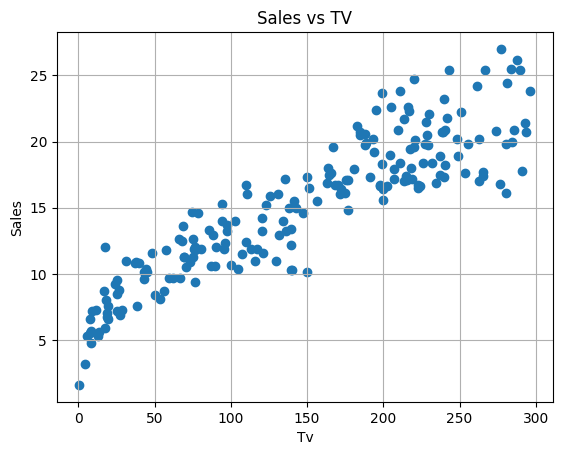

In [283]:
plt.scatter(X,y)
plt.title("Sales vs TV")
plt.xlabel("Tv")
plt.ylabel("Sales")
plt.grid()
plt.show()

Data Splitting

In [284]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Number of sample in training set:", len(X_train))
print("Number of sample in the testing set:",len(X_test))

Number of sample in training set: 160
Number of sample in the testing set: 40


Model Training

In [285]:
print("Training the Linear Regression model.........")
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Training complete!")

Training the Linear Regression model.........
Model Training complete!


Model Evaluation

In [286]:
print("Evaluating the model")
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared : {r2:.2f}")

# You can also look at the coefficients to understand the model's equation
print("Model Coefficients")
print("coefficients: ", model.coef_)
print("intercept: ", model.intercept_)

Evaluating the model
Mean Squared Error (MSE): 6.10
R-squared : 0.80
Model Coefficients
coefficients:  [[0.05548294]]
intercept:  [7.00710843]


Visualization of Results

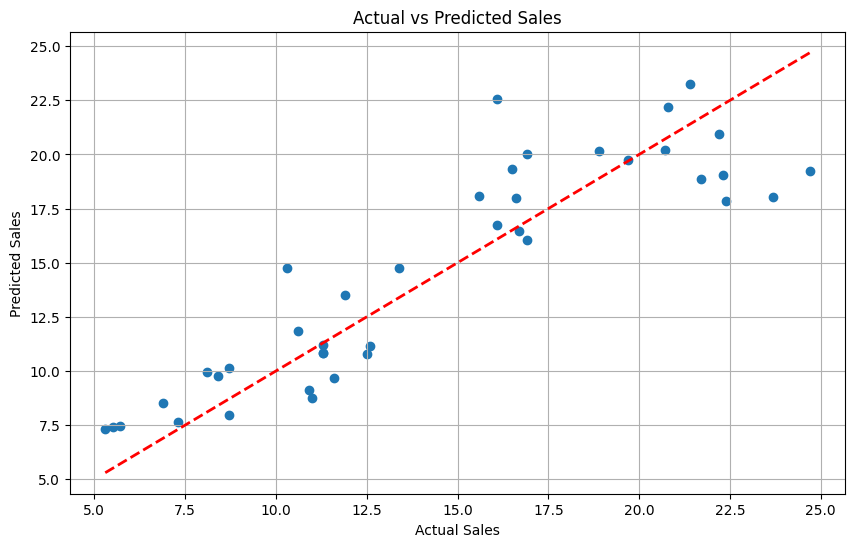

In [287]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()

Making a New Prediction

In [288]:
new_data = pd.DataFrame({
    "tv":[200]
})

predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales}")

Predicted Sales: [[18.10369721]]
